In [98]:
import numpy as np
import time
import matplotlib.pyplot as plt
import random
import re

allowableTime = 2 # time allowed in seconds
p = 1 + np.random.randint(1000, size = 612) # job processing times
p = np.append(p, 1 + np.random.randint(2001, size = 132))
p = np.append(p, 1 + 1 + np.random.negative_binomial(n = 1500, p = 0.5, size = 201))
m = 201 # number of machines
inst = np.append(p,m)

In [100]:
### creating an example txt instance

with open("instance.txt", "w") as f:
    print(inst, file = f)

In [81]:
lst = str([line.rstrip('\n') for line in open('instance.txt')])

In [85]:
inst = list(map(int, re.findall('\d+', str([line.rstrip('\n') for line in open('instance.txt')]))))

In [86]:
len(inst)

946

In [82]:
test_lst = re.findall('\d+', lst)

In [83]:
tst = list(map(int, test_lst))
len(tst)

946

In [101]:
def import_inst(filename):
    '''
    imports a text file instance, converts it to an array and then allocates it to p and m, 
    where p are the jobs and m is the number of machines
    '''
    inst = list(map(int, re.findall('\d+', str([line.rstrip('\n') for line in open(filename)]))))
    global p, m
    m =  int(inst[-1])
    p = inst[:-1]

In [102]:
import_inst("instance.txt")

In [97]:
m

[84, 34, 654, 45, 34, 34, 3, 3, 4, 3]

In [103]:
class agent:
    def __init__(self): 
        ### Does this need to be __init__(self, machine, workload) ? Or do we only want self because different methods take 
        ### different attributes ?
        self.machine = [] # list of length len(p), where self.machine[job] = machine assigned to job
        self.workload = np.array([]) # np.array of length m, where self.workload[machine] = sum of processing times of jobs 
                                        # assigned to machine
        self.cost = None # cost of current feasible solution
        self.costTrajectory = [] # list of cost of feasible solution found in each step
    # generates a random initial feasible solution
    def generateInitialSolution(self):
        self.machine = []
        self.workload = np.zeros(m)
        for job in range(len(p)):
            machine = np.random.randint(m) # randomly select machine to assign job to 
            ### should we have different variable name given that 'machine' is already an attribute ?
            self.machine.append(machine) # assign 'job' to 'machine'
            self.workload[machine] += p[job] # add job processing time to workload of 'machine'
        self.cost = np.max(self.workload)
    # switch assigned machine of 'job' to 'toMachine'
    def switchMachine(self, job, toMachine):
        self.workload[self.machine[job]] += -p[job]
        self.machine[job] = toMachine
        self.workload[toMachine] += p[job]
    # Note that this is just a (random) local search implementation, not greedy local search as question 1 asks
    def localSearchIteration(self, k):
        costAlpha = self.cost
        jobs = [int(len(p)*random.random()) for i in range(k)] # randomly choose k jobs to reassign
        machines = [int(m*random.random()) for i in range(k)] # randomly choose k machines to assign these jobs to
        initialMachines = [self.machine[i] for i in jobs]
        for (job, machine) in zip(jobs, machines):
            self.switchMachine(job, machine)
        costBeta = self.workload[np.argmax(self.workload)] # find max workload across machines, faster than np.max(self.workload) 
        # if new feasible solution is worse then go back, otherwise stay
        if costBeta > costAlpha:
            for (job, machine) in zip(jobs, initialMachines):
                self.switchMachine(job, machine)
            self.costTrajectory.append(costAlpha)
        else:
            self.cost = costBeta
            self.costTrajectory.append(costBeta)
    # k defines the size of the neighbourhood and totalTime determines how much time the function is allowed to run
    def localSearch(self, k, totalTime):
        initialTime = time.time()
        # note: algorithm may run later than cut-off if iteration takes too long!
        while time.time() - initialTime < totalTime:
            self.localSearchIteration(k)

In [104]:
A = agent()
A.generateInitialSolution()
A.localSearch(4, allowableTime)

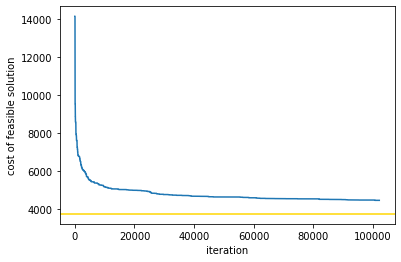

In [105]:
plt.plot(A.costTrajectory)
plt.xlabel("iteration")
plt.ylabel("cost of feasible solution")
plt.axhline(y = max(sum(p)/m, np.max(p)), color = "gold") # lower bound for global minimum

In [106]:
def verifyFeasibleSolution(A):
    # check that each job is assigned to exactly one machine
    assert(len(A.machine) == len(p))
    # check that there are at most m machines that have jobs assigned to them
    assert(max(A.machine) <= m)

    # check that the workloads are as indicated in A.workload
    workload = np.zeros(m)
    for job in range(len(p)):
        workload[A.machine[job]] += p[job]
    for i in range(m):
        assert(workload[i] == A.workload[i])

    # check that the maximum of the workloads (i.e. the cost) is as indicated in A.cost
    assert(np.isclose(A.cost, np.max(A.workload)))


In [107]:
verifyFeasibleSolution(A)

In [108]:
np.random.randint(10)

9